# Keras

Keras es una librería de alto nivel para generar redes neuronales. Fue concebida para funcionar como una interfaz amigable hacia el framework de inteligencia artificial *Tensorflow*, desarrollado por Google.

_Código tomado en parte de [este link](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)._

In [ ]:
#Instalar tensorflow. Seguit documentacion TensorFlow instalar con pip
# conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
# conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
# python3 -m pip install tensorflow-cpu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras.layers import Dense
# Optimizador
from tensorflow.keras.optimizers import Adam

In [2]:
data_df = pd.read_csv("diabetes.csv", header=None)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
X = data_df.iloc[:,0:8]
y = data_df.iloc[:,8]

In [4]:
X.shape

(768, 8)

In [5]:
# Crear red neuronal 
model = Sequential()

# Primer parámetro: cantidad de neuronas
# Segundo (solo en la primer capa): cantidad de entrada
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

2022-08-29 18:49:00.377287: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
historial = model.fit(
    X.values,
    y.values,
    epochs=75,
    verbose=2
)

Epoch 1/75
24/24 - 0s - loss: 4.5441 - accuracy: 0.5221 - 271ms/epoch - 11ms/step
Epoch 2/75
24/24 - 0s - loss: 3.2271 - accuracy: 0.5156 - 15ms/epoch - 605us/step
Epoch 3/75
24/24 - 0s - loss: 2.0662 - accuracy: 0.5052 - 14ms/epoch - 603us/step
Epoch 4/75
24/24 - 0s - loss: 1.3294 - accuracy: 0.5117 - 17ms/epoch - 690us/step
Epoch 5/75
24/24 - 0s - loss: 1.0832 - accuracy: 0.5612 - 21ms/epoch - 878us/step
Epoch 6/75
24/24 - 0s - loss: 0.9556 - accuracy: 0.5729 - 20ms/epoch - 835us/step
Epoch 7/75
24/24 - 0s - loss: 0.8784 - accuracy: 0.5651 - 20ms/epoch - 817us/step
Epoch 8/75
24/24 - 0s - loss: 0.8363 - accuracy: 0.5833 - 21ms/epoch - 894us/step
Epoch 9/75
24/24 - 0s - loss: 0.7884 - accuracy: 0.5898 - 22ms/epoch - 908us/step
Epoch 10/75
24/24 - 0s - loss: 0.7538 - accuracy: 0.6120 - 21ms/epoch - 880us/step
Epoch 11/75
24/24 - 0s - loss: 0.7360 - accuracy: 0.6380 - 23ms/epoch - 956us/step
Epoch 12/75
24/24 - 0s - loss: 0.7321 - accuracy: 0.6250 - 21ms/epoch - 888us/step
Epoch 13/75
2

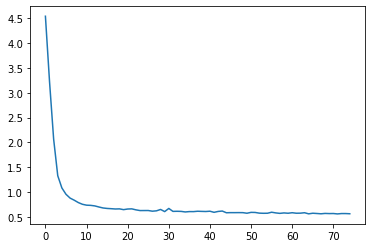

In [9]:
plt.plot(historial.history['loss'])
plt.show()

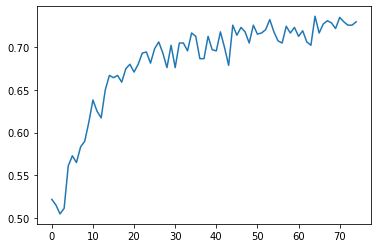

In [10]:
plt.plot(historial.history['accuracy'])
plt.show()

In [11]:
# Grabar modelo
model.save('model_diabetes')

INFO:tensorflow:Assets written to: model_diabetes/assets


In [13]:
import tensorflow as tf

In [14]:
# Leer modelo
new_model = tf.keras.models.load_model('model_diabetes')

new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
